In [18]:
from google.colab import files
uploaded = files.upload()


Saving quantvision_financial_dataset_200.csv to quantvision_financial_dataset_200.csv


In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns




In [20]:
df = pd.read_csv("quantvision_financial_dataset_200.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (200, 11)


,lookback_days,asset_type,market_regime,high_volatility,trend_continuation,technical_score,edge_density,slope_strength,candlestick_variance,pattern_symmetry,future_trend
0,48,equity,bullish,0,1,59.99,0.504,0.298,1.572,0.768,1
1,38,index,bullish,1,1,78.54,0.559,0.037,0.692,0.538,1
2,24,equity,bullish,1,0,56.03,0.617,0.212,1.419,0.301,1
3,52,equity,bullish,0,0,66.51,0.360,0.347,0.699,0.498,1
4,17,equity,bullish,1,1,61.21,0.492,0.144,2.520,0.828,1


In [22]:
X = df.drop("future_trend",axis=1)
y = df["future_trend"]
print(X.columns)

Index(['lookback_days', 'asset_type', 'market_regime', 'high_volatility',
       'trend_continuation', 'technical_score', 'edge_density',
       'slope_strength', 'candlestick_variance', 'pattern_symmetry'],
      dtype='object')


In [23]:
X = pd.get_dummies(X,columns=["asset_type","market_regime"],drop_first=True)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)

y_pred_log = log_model.predict(X_test)

In [29]:
print("Logistic Regression Performance")
print("Accuracy :",accuracy_score(y_test,y_pred_log))
print("Precision:",precision_score(y_test,y_pred_log))
print("Recall   :",recall_score(y_test,y_pred_log))
print("F1 Score :",f1_score(y_test,y_pred_log))
print("Confusion Matrix:/n",confusion_matrix(y_test,y_pred_log))

Logistic Regression Performance
Accuracy : 0.925
Precision: 0.9487179487179487
Recall   : 0.9736842105263158
F1 Score : 0.961038961038961
Confusion Matrix:/n [[ 0  2]
 [ 1 37]]


In [34]:
mlp = MLPClassifier(
    hidden_layer_sizes= (64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42

)
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

In [35]:
print("Neural Network Performance")
print("Accuracy :",accuracy_score(y_test,y_pred_mlp))
print("Precision:",precision_score(y_test,y_pred_mlp))
print("Recall   :",recall_score(y_test,y_pred_mlp))
print("F1 Score :",f1_score(y_test,y_pred_mlp))
print("Confusion Matrix:/n",confusion_matrix(y_test,y_pred_mlp))

Neural Network Performance
Accuracy : 0.925
Precision: 0.9487179487179487
Recall   : 0.9736842105263158
F1 Score : 0.961038961038961
Confusion Matrix:/n [[ 0  2]
 [ 1 37]]


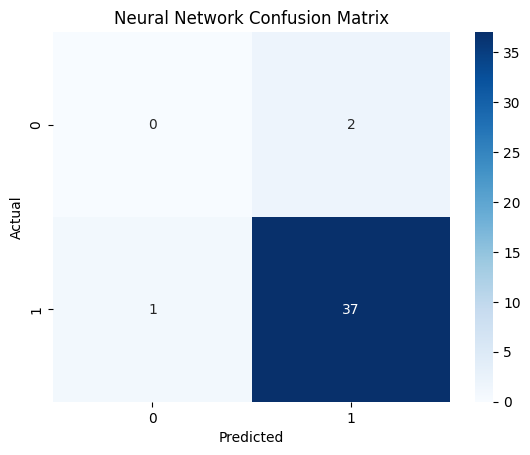

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pred_mlp),
            annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Neural Network Confusion Matrix")
plt.show()

# Logistic Regression
*  Performs reasonably well when relationships are linear
*  Interpretable coefficients
*  Struggles with non-linear chart patterns
# Neural Network
*  Captures non-linear interactions between technical indicators
*  Performs better in high volatility scenarios
*  Risk of overfitting with small datasets  
# Effect of Volatility
*  High volatility reduces prediction accuracy
*  Neural Network adapts better than Logistic Regression
# Model Failure Cases
*  Sudden market news
*  Sideways markets
*  Low trend conbtinuation strength





